# Linear Models

## CONTENTS

### Simple Linear Regression
### Multiple Linear Regression
### Analysis-of-Variance
### Generalized Linear Models
### Logistic Regression
### Navie Bayes 
### Web Scraping in Python

## Resourses

- **LINEAR MODELS IN STATISTICS**, Alvin C. Rencher and G. Bruce Schaalje

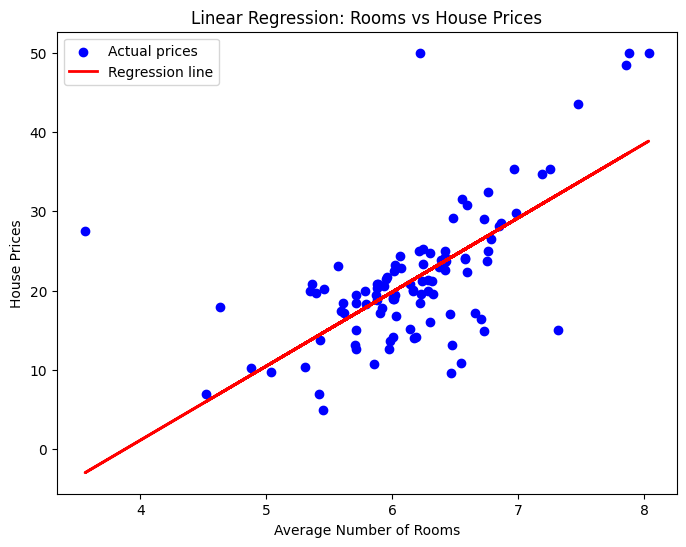

'The linear regression model trained on the Boston Housing dataset predicts house prices based on the average number of rooms per dwelling. The model achieved a Mean Squared Error (MSE) of 46.14, which indicates the average squared difference between actual and predicted values. The R-squared score is 0.37, meaning that 37.08% of the variance in house prices can be explained by the number of rooms. A higher R-squared score would indicate a better fit.'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the Linear Regression Model Class
class LinearRegressionModel:
    def __init__(self):
        # Fetching the Boston Housing dataset
        self.dataset = fetch_openml(name="boston", version=1, as_frame=True)
        self.X = self.dataset.data[['RM']]  # Using only 'RM' (average number of rooms) for simplicity
        self.y = self.dataset.target  # Housing prices
        
        # Split the data into training and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)
        
        # Initializing the model
        self.model = LinearRegression()
    
    def train(self):
        # Train the linear regression model
        self.model.fit(self.X_train, self.y_train)
    
    def predict(self):
        # Predict on the test set
        return self.model.predict(self.X_test)
    
    def evaluate(self):
        # Evaluate the model using RMSE and R2 score
        predictions = self.predict()
        mse = mean_squared_error(self.y_test, predictions)
        r2 = r2_score(self.y_test, predictions)
        return mse, r2
    
    def plot_results(self):
        # Plot the regression line and test data points
        plt.figure(figsize=(8,6))
        plt.scatter(self.X_test, self.y_test, color='blue', label='Actual prices')
        plt.plot(self.X_test, self.predict(), color='red', linewidth=2, label='Regression line')
        plt.title('Linear Regression: Rooms vs House Prices')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('House Prices')
        plt.legend()
        plt.show()
    
    def interpret_results(self):
        # Interpretation of the results
        mse, r2 = self.evaluate()
        interpretation = (f"The linear regression model trained on the Boston Housing dataset "
                          f"predicts house prices based on the average number of rooms per dwelling. "
                          f"The model achieved a Mean Squared Error (MSE) of {mse:.2f}, "
                          f"which indicates the average squared difference between actual and predicted values. "
                          f"The R-squared score is {r2:.2f}, meaning that {r2*100:.2f}% of the variance in house prices "
                          f"can be explained by the number of rooms. A higher R-squared score would indicate a better fit.")
        return interpretation

# Instantiate and run the linear regression model
model = LinearRegressionModel()
model.train()
model.plot_results()
model.interpret_results()


In [7]:
model.dataset

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [8]:
model.y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [9]:
model.evaluate

<bound method LinearRegressionModel.evaluate of <__main__.LinearRegressionModel object at 0x0000020060DA3650>>

In [10]:
model.X_test

,RM
173,6.416
274,6.758
491,5.983
72,6.065
452,6.297
...,...
412,4.628
436,6.461
411,6.657
86,6.015


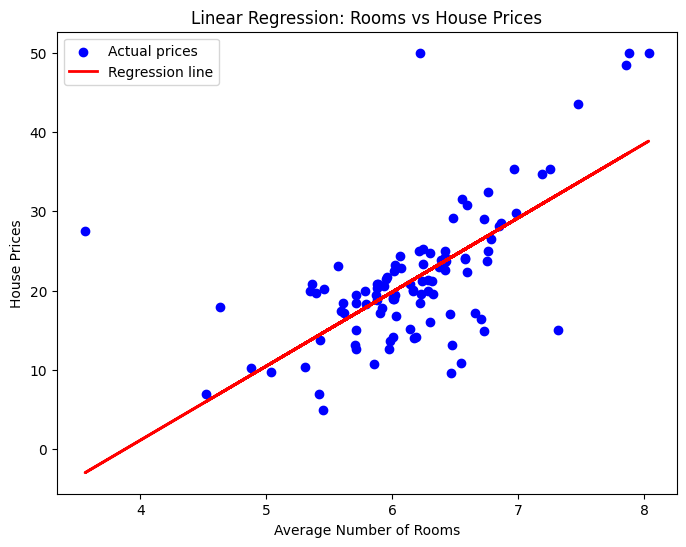

In [13]:
model.plot_results()